<a href="https://colab.research.google.com/github/cstirneman1/MLA_CMS/blob/main/MLA4_CMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports for specific models


Standard imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Imports for Decision Trees


In [ ]:
from sklearn import tree
from sklearn.tree import export_text

Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
set_config(display='diagram')

Imports for Performance Measures


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

#SVC Classification - Acquire Data


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#Splitting Data into Train/Test


Create a data frame called X of your inputs that includes all columns except
date and forgery.

In [ ]:
X = df.drop(['forgery'], axis=1)

Create a data frame called y of your output that includes only forgery This will be your target variable that you are trying to predict.


In [ ]:
y = df['forgery']

Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.shape)

(1097,)


#Building the Pipeline


Create a column transformer that will MinMax scale the numerical variables

In [ ]:
col_transform = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X.columns)
    ])

Create a pipeline that will transform the data and then run the DecisionTreeClassification algorithm.

In [ ]:
pipeline = Pipeline(steps=[
    ('transformer', col_transform),
    ('classifier', tree.DecisionTreeClassifier())
])

#Executing the Model


Run the pipeline to fit the DecisionTreeClassification model.


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

#Evaluating the Model


Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [ ]:
y_pred = pipeline.predict(X_test)

Call the plot_cm function to generate the confusion matrix.


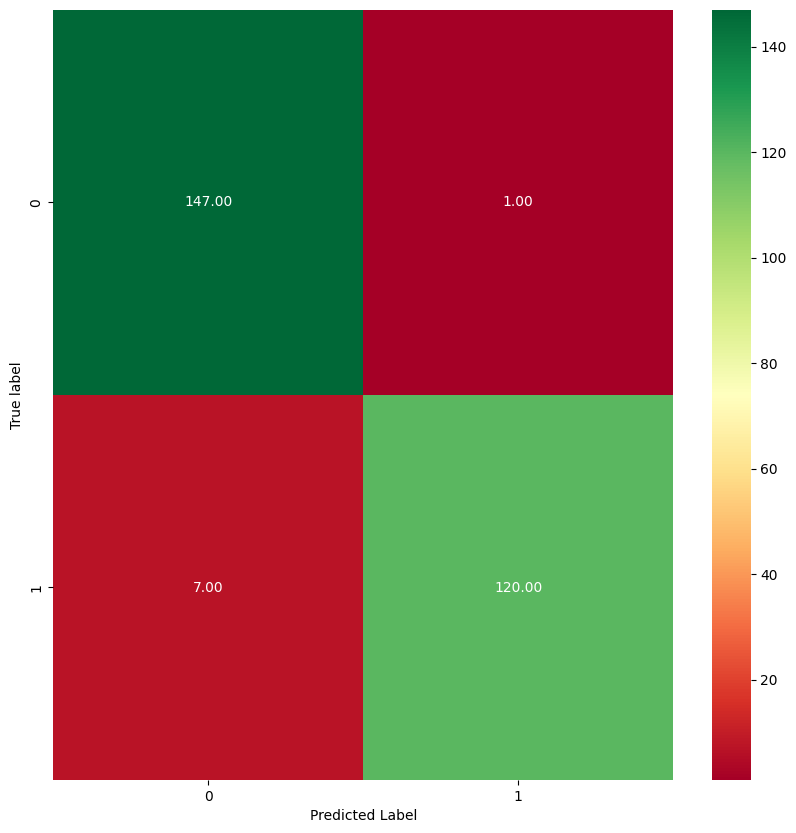

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

plot_cm(y_test, y_pred)

Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9917355371900827
Recall: 0.9448818897637795
F1 Score: 0.9677419354838711


#Conclusion


High Precision (0.99): This metric indicates that when the model predicts a banknote is a forgery, it is correct approximately 99% of the time. A high precision is crucial in scenarios where the cost of a false positive (wrongly identifying a genuine banknote as a forgery) is high, as it minimizes the risk of discarding or further investigating genuine banknotes unnecessarily.

High Recall (0.94): The recall score tells us that the model successfully identifies 94% of all forgeries. This is particularly important in a forgery detection context because it indicates a low rate of false negatives (failing to identify a forgery). In practical terms, it means very few forgeries would go undetected and be potentially circulated, maintaining the integrity of the currency.

High F1 Score (0.97): The F1 score balances precision and recall, providing a single metric to assess the overall performance of the model when both false positives and false negatives are costly. An F1 score of 0.97 suggests that the model achieves an excellent balance between correctly identifying forgeries and minimizing false alerts.

#Problem 2

#Acquire Data


Load the banknote_authentication.csv into a data frame named df.


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/Steel_industry_data.csv')
df.rename(columns = {'Usage_kWh': 'usage_kwh','Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh','Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh','Lagging_Current_Power_Factor':'lag_current_pwr','Leading_Current_Power_Factor':'lead_current_pwr','NSM':'nsm','WeekStatus':'week_status','Day_of_week':'day_of_week','Load_Type':'load_type'}, inplace=True)
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


#Splitting Data into Train/Test


Create a data frame called X of your inputs that includes all columns except date and usage_kwh.


In [ ]:
X = df.drop(['date', 'usage_kwh'], axis=1)

Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.


In [ ]:
y = df['usage_kwh']

Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Building the Pipeline


Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).


In [ ]:
num_attribs = ['lag_react_pwr_kvarh',	'lead_react_pwr_kvarh',	'CO2(tCO2)',	'lag_current_pwr',	'lead_current_pwr',	'nsm']
cat_attribs = ['week_status',	'day_of_week',	'load_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_attribs),
        ('cat', OneHotEncoder(), cat_attribs),
    ])

Create a pipeline that will transform the data and then run the DecisionTreeRegression algorithm.


In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', tree.DecisionTreeRegressor())
])

#Executing the Model


Run the pipeline to fit the DecisionTreeRegression.

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('regressor', DecisionTreeRegressor())])

#Evaluating the Model


Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [ ]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)

print(f'Training RMSE: {rmse_train}')
print(f'Testing RMSE: {rmse_test}')

Training RMSE: 3.356570507642558e-32
Testing RMSE: 1.9876104452054792


#Conclusion

The contrast between the training and testing RMSE suggests that the model may be overfitting. It's highly effective on the training data but less so on unseen data.
The testing RMSE of approximately 1.99 implies that the model, despite potential overfitting, can still make reasonably accurate predictions on new data. The suitability of this performance level depends on the specific application requirements and the acceptable error margin in predicting kWh usage.